<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_4X/blob/main/GQtest_data_multi_delta_(0_4)_n120_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_4X/multiplication_delta_0.4'

In [4]:
os.listdir(base_path)

['data_multi_delta_0.4_n20.csv',
 'data_multi_delta_0.4_n30.csv',
 'data_multi_delta_0.4_n60.csv',
 'data_multi_delta_0.4_n120.csv',
 'data_multi_delta_0.4_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_0.4_n120.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,21.489632,52.869716,47.514552,61.413732,0.759418,194.047050,194.032635,0.014415
1,0.0,1.0,33.962385,89.812743,98.677641,59.631382,0.818581,292.902731,292.517012,0.385719
2,0.0,2.0,46.059459,89.759132,35.829734,20.173205,-1.444563,200.376966,202.135849,-1.758883
3,0.0,3.0,26.664851,66.621270,83.419570,32.503938,5.875017,225.084646,220.128055,4.956591
4,0.0,4.0,71.730229,91.089132,95.572929,25.097810,1.199181,294.689281,293.714843,0.974437
...,...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,40.148527,21.395009,21.001881,94.220190,0.455135,187.220742,186.221573,0.999170
119996,999.0,116.0,95.393783,43.566475,25.065194,75.638816,-2.039728,247.624540,249.787820,-2.163280
119997,999.0,117.0,40.793926,29.714050,49.337824,29.716179,2.474571,162.036550,159.331974,2.704576
119998,999.0,118.0,37.773940,60.043812,84.172010,44.508792,-1.241944,235.256610,236.557859,-1.301249


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,21.489632,52.869716,47.514552,61.413732,0.759418,194.047050,194.032635,0.014415
1,0.0,1.0,33.962385,89.812743,98.677641,59.631382,0.818581,292.902731,292.517012,0.385719
2,0.0,2.0,46.059459,89.759132,35.829734,20.173205,-1.444563,200.376966,202.135849,-1.758883
3,0.0,3.0,26.664851,66.621270,83.419570,32.503938,5.875017,225.084646,220.128055,4.956591
4,0.0,4.0,71.730229,91.089132,95.572929,25.097810,1.199181,294.689281,293.714843,0.974437
...,...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,40.148527,21.395009,21.001881,94.220190,0.455135,187.220742,186.221573,0.999170
119996,999.0,116.0,95.393783,43.566475,25.065194,75.638816,-2.039728,247.624540,249.787820,-2.163280
119997,999.0,117.0,40.793926,29.714050,49.337824,29.716179,2.474571,162.036550,159.331974,2.704576
119998,999.0,118.0,37.773940,60.043812,84.172010,44.508792,-1.241944,235.256610,236.557859,-1.301249


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    21.489632  52.869716  47.514552  61.413732  0.759418  194.047050   
      1.0    33.962385  89.812743  98.677641  59.631382  0.818581  292.902731   
      2.0    46.059459  89.759132  35.829734  20.173205 -1.444563  200.376966   
      3.0    26.664851  66.621270  83.419570  32.503938  5.875017  225.084646   
      4.0    71.730229  91.089132  95.572929  25.097810  1.199181  294.689281   
...                ...        ...        ...        ...       ...         ...   
999.0 115.0  40.148527  21.395009  21.001881  94.220190  0.455135  187.220742   
      116.0  95.393783  43.566475  25.065194  75.638816 -2.039728  247.624540   
      117.0  40.793926  29.714050  49.337824  29.716179  2.474571  162.036550   
      118.0  37.773940  60.043812  84.172010  44.508792 -1.241944  235.256610   
      119.0  57.912191  27.451691  67.773143  67.949323 -1.852489  229.233858   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    194.032635  0.014415  
      1.0    292.517012  0.385719  
      2.0    202.135849 -1.758883  
      3.0    220.128055  4.956591  
      4.0    293.714843  0.974437  
...                 ...       ...  
999.0 115.0  186.221573  0.999170  
      116.0  249.787820 -2.163280  
      117.0  159.331974  2.704576  
      118.0  236.557859 -1.301249  
      119.0  231.229323 -1.995465  

[120000 rows x 8 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    21.489632  52.869716  47.514552  61.413732  0.759418  194.047050   
      1.0    33.962385  89.812743  98.677641  59.631382  0.818581  292.902731   
      2.0    46.059459  89.759132  35.829734  20.173205 -1.444563  200.376966   
      3.0    26.664851  66.621270  83.419570  32.503938  5.875017  225.084646   
      4.0    71.730229  91.089132  95.572929  25.097810  1.199181  294.689281   
...                ...        ...        ...        ...       ...         ...   
999.0 115.0  40.148527  21.395009  21.001881  94.220190  0.455135  187.220742   
      116.0  95.393783  43.566475  25.065194  75.638816 -2.039728  247.624540   
      117.0  40.793926  29.714050  49.337824  29.716179  2.474571  162.036550   
      118.0  37.773940  60.043812  84.172010  44.508792 -1.241944  235.256610   
      119.0  57.912191  27.451691  67.773143  67.949323 -1.852489  229.233858   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    194.032635  0.014415  
      1.0    292.517012  0.385719  
      2.0    202.135849 -1.758883  
      3.0    220.128055  4.956591  
      4.0    293.714843  0.974437  
...                 ...       ...  
999.0 115.0  186.221573  0.999170  
      116.0  249.787820 -2.163280  
      117.0  159.331974  2.704576  
      118.0  236.557859 -1.301249  
      119.0  231.229323 -1.995465  

[120000 rows x 8 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,21.489632,52.869716,47.514552,61.413732,0.759418,194.047050,194.032635,0.014415
1,0.0,1.0,33.962385,89.812743,98.677641,59.631382,0.818581,292.902731,292.517012,0.385719
2,0.0,2.0,46.059459,89.759132,35.829734,20.173205,-1.444563,200.376966,202.135849,-1.758883
3,0.0,3.0,26.664851,66.621270,83.419570,32.503938,5.875017,225.084646,220.128055,4.956591
4,0.0,4.0,71.730229,91.089132,95.572929,25.097810,1.199181,294.689281,293.714843,0.974437
...,...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,40.148527,21.395009,21.001881,94.220190,0.455135,187.220742,186.221573,0.999170
119996,999.0,116.0,95.393783,43.566475,25.065194,75.638816,-2.039728,247.624540,249.787820,-2.163280
119997,999.0,117.0,40.793926,29.714050,49.337824,29.716179,2.474571,162.036550,159.331974,2.704576
119998,999.0,118.0,37.773940,60.043812,84.172010,44.508792,-1.241944,235.256610,236.557859,-1.301249


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    21.489632  52.869716  47.514552  61.413732  0.759418  194.047050   
      1.0    33.962385  89.812743  98.677641  59.631382  0.818581  292.902731   
      2.0    46.059459  89.759132  35.829734  20.173205 -1.444563  200.376966   
      3.0    26.664851  66.621270  83.419570  32.503938  5.875017  225.084646   
      4.0    71.730229  91.089132  95.572929  25.097810  1.199181  294.689281   
...                ...        ...        ...        ...       ...         ...   
999.0 115.0  40.148527  21.395009  21.001881  94.220190  0.455135  187.220742   
      116.0  95.393783  43.566475  25.065194  75.638816 -2.039728  247.624540   
      117.0  40.793926  29.714050  49.337824  29.716179  2.474571  162.036550   
      118.0  37.773940  60.043812  84.172010  44.508792 -1.241944  235.256610   
      119.0  57.912191  27.451691  67.773143  67.949323 -1.852489  229.233858   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    194.032635  0.014415  
      1.0    292.517012  0.385719  
      2.0    202.135849 -1.758883  
      3.0    220.128055  4.956591  
      4.0    293.714843  0.974437  
...                 ...       ...  
999.0 115.0  186.221573  0.999170  
      116.0  249.787820 -2.163280  
      117.0  159.331974  2.704576  
      118.0  236.557859 -1.301249  
      119.0  231.229323 -1.995465  

[120000 rows x 8 columns]

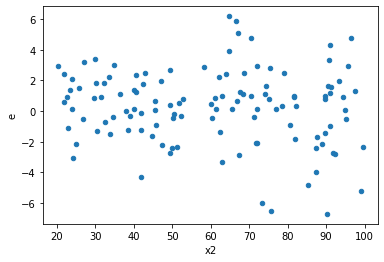

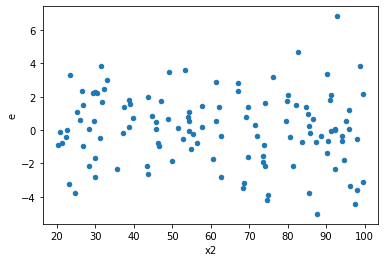

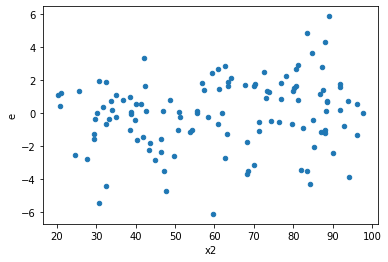

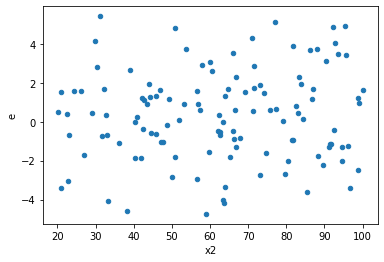

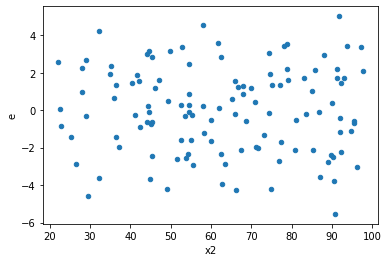

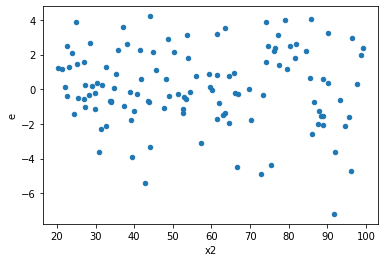

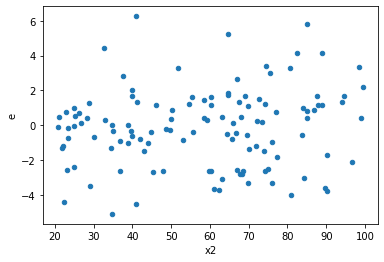

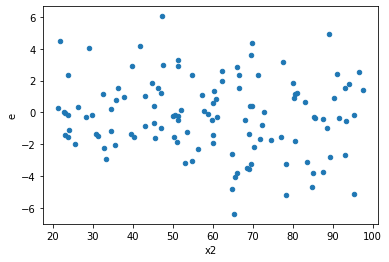

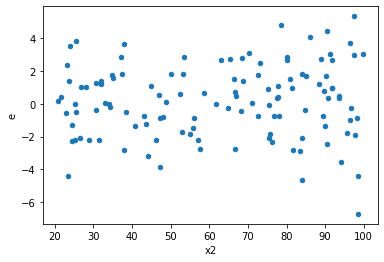

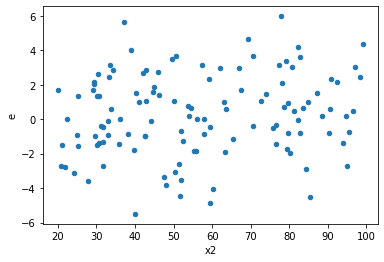

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x2
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3', 'x4']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,44.0,44.0,140.33348162380287,343.1485717374885,3.1893973096318833,7.798831175852012,2.4452366446474945,0.003708110239825313,0.9981459448800873,0.0018540551199126565,Reject005=0 : Heteroscedasticity
1.0,44.0,44.0,145.32334541180012,270.7116582784107,3.302803304813639,6.152537688145698,1.862822917483079,0.04180428594477448,0.9790978570276128,0.02090214297238724,Reject005=0 : Heteroscedasticity
2.0,44.0,44.0,149.84379627734086,212.33245639973956,3.4055408244850196,4.825737645448626,1.417025340219895,0.2515387971928269,0.8742306014035865,0.12576939859641345,Reject005=1 : Homoscedasticity
3.0,44.0,44.0,214.211717140665,268.27600227760183,4.868448116833296,6.097181869945496,1.252387151639491,0.45844717550360725,0.7707764122481964,0.22922358775180363,Reject005=1 : Homoscedasticity
4.0,44.0,44.0,219.6968549064282,260.9028572664521,4.993110338782459,5.929610392419366,1.1875584535680954,0.5710201048254069,0.7144899475872966,0.28551005241270344,Reject005=1 : Homoscedasticity
5.0,44.0,44.0,160.84740318443968,328.69514453383886,3.6556227996463564,7.470344193950883,2.0435216113307866,0.019667273898967164,0.9901663630505164,0.009833636949483582,Reject005=0 : Heteroscedasticity
6.0,44.0,44.0,195.72201279663176,236.88379002139857,4.448227563559812,5.383722500486331,1.2103073468161023,0.5293503257211389,0.7353248371394305,0.26467516286056947,Reject005=1 : Homoscedasticity
7.0,44.0,44.0,172.12486164421762,274.81322057034976,3.9119286737322185,6.245755012962494,1.5965922525380973,0.1245256772386294,0.9377371613806853,0.0622628386193147,Reject005=1 : Homoscedasticity
8.0,44.0,44.0,180.7385703697401,307.02533280096793,4.107694781130457,6.977848472749272,1.698726133402963,0.08230829516754601,0.958845852416227,0.041154147583773004,Reject005=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,44.0,44.0,140.33348162380287,343.1485717374885,3.1893973096318833,7.798831175852012,2.4452366446474945,0.003708110239825313,Reject005=0 : Heteroscedasticity
1.0,44.0,44.0,145.32334541180012,270.7116582784107,3.302803304813639,6.152537688145698,1.862822917483079,0.04180428594477448,Reject005=0 : Heteroscedasticity
2.0,44.0,44.0,149.84379627734086,212.33245639973956,3.4055408244850196,4.825737645448626,1.417025340219895,0.2515387971928269,Reject005=1 : Homoscedasticity
3.0,44.0,44.0,214.211717140665,268.27600227760183,4.868448116833296,6.097181869945496,1.252387151639491,0.45844717550360725,Reject005=1 : Homoscedasticity
4.0,44.0,44.0,219.6968549064282,260.9028572664521,4.993110338782459,5.929610392419366,1.1875584535680954,0.5710201048254069,Reject005=1 : Homoscedasticity
5.0,44.0,44.0,160.84740318443968,328.69514453383886,3.6556227996463564,7.470344193950883,2.0435216113307866,0.019667273898967164,Reject005=0 : Heteroscedasticity
6.0,44.0,44.0,195.72201279663176,236.88379002139857,4.448227563559812,5.383722500486331,1.2103073468161023,0.5293503257211389,Reject005=1 : Homoscedasticity
7.0,44.0,44.0,172.12486164421762,274.81322057034976,3.9119286737322185,6.245755012962494,1.5965922525380973,0.1245256772386294,Reject005=1 : Homoscedasticity
8.0,44.0,44.0,180.7385703697401,307.02533280096793,4.107694781130457,6.977848472749272,1.698726133402963,0.08230829516754601,Reject005=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      799
Reject005=0 : Heteroscedasticity    201
Name: Result_test, dtype: int64